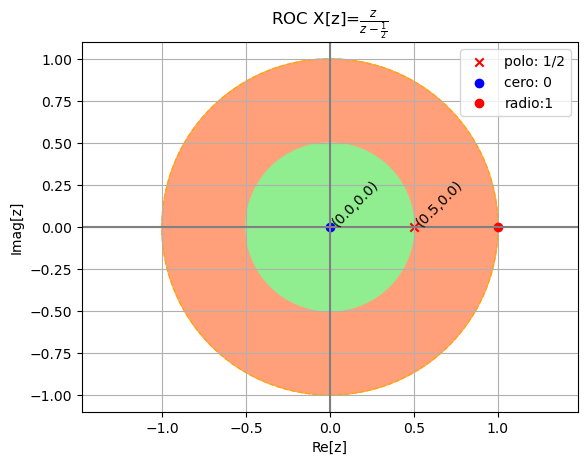

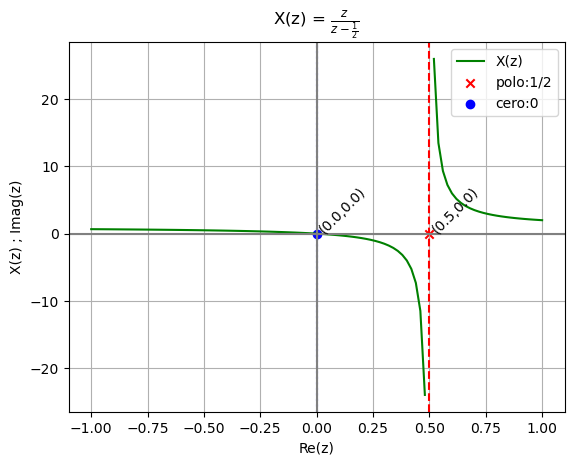

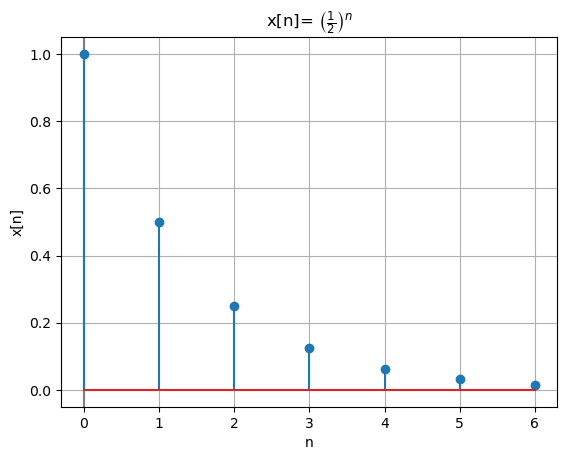

In [4]:

# transformada z de x[n]u[n]
import sympy as sym

# INGRESO
z = sym.symbols('z')
n = sym.symbols('n', positive=True)
a = sym.symbols('a')
u = sym.Heaviside(n)

fn = (a**n)*u

# valor a como racional en dominio 'ZZ' enteros
a_k = sym.Rational(1/2).limit_denominator(100)
m   = 7        # Términos a graficar
muestras = 101 # dominio z

# PROCEDIMIENTO
fnz = fn*(z**(-n)) # f(n,z) para sumatoria
# sumatoria transformada z
Fz_sum = sym.summation(fnz,(n,0,sym.oo))
Fz_eq  = Fz_sum.args[0]  # primera ecuacion e intervalo
Fz = Fz_eq[0].simplify() # solo expresion

ROC = Fz_eq[1]  # condicion ROC

# polos y ceros de Fz
[P,Q] = Fz.as_numer_denom()
P = sym.poly(P,z)
Q = sym.poly(Q,z)
P_ceros = sym.roots(P)
Q_polos = sym.roots(Q)



# GRAFICA  -----------
import numpy as np
import matplotlib.pyplot as plt
import telg1001 as fcnm

def graficar_Fz_polos(Fz,Q_polos={},P_ceros={},
                z_a=1,z_b=0,muestras=101,f_nombre='F',
                solopolos=False):
    ''' polos y ceros plano z imaginario
    '''
    fig_zROC, graf_ROC = plt.subplots()
    # limite con radio 1
    radio1 = plt.Circle((0,0),1,color='lightsalmon',
                        fill=True)
    radio2 = plt.Circle((0,0),1,linestyle='dashed',
                        color='orange',fill=False)
    graf_ROC.add_patch(radio1)
    for unpolo in Q_polos.keys():
        [r_real,r_imag] = unpolo.as_real_imag()
        unpolo_radio = np.abs(unpolo)
        unpolo_ROC = plt.Circle((0,0),unpolo_radio,
                          color='lightgreen',fill=True)
        graf_ROC.add_patch(unpolo_ROC)
    graf_ROC.add_patch(radio2) # borde r=1
    graf_ROC.axis('equal')
    # marcas de r=1 y polos
    for unpolo in Q_polos.keys():
        x_polo = sym.re(unpolo)
        y_polo = sym.im(unpolo)
        etiqueta = 'polo: '+str(unpolo)
        graf_ROC.scatter(x_polo,y_polo,marker='x',
                        color='red',label = etiqueta)
        etiqueta = "("+str(float(x_polo)) + ','
        etiqueta = etiqueta + str(float(y_polo))+")"
        plt.annotate(etiqueta,(x_polo,y_polo), rotation=45)
    # marcas de ceros
    for uncero in P_ceros.keys():
        x_cero = sym.re(uncero)
        y_cero = sym.im(uncero)
        etiqueta = 'cero: '+str(uncero)
        graf_ROC.scatter(x_cero,y_cero,marker='o',
                        color='blue',label = etiqueta)
        etiqueta = "("+str(float(x_cero)) + ','
        etiqueta = etiqueta + str(float(y_cero))+")"
        plt.annotate(etiqueta,(x_cero,y_cero), rotation=45)
    # limita radio 1
    graf_ROC.plot(1,0,'o',color='red',
                 label ='radio:'+str(1))
    graf_ROC.axhline(0,color='grey')
    graf_ROC.axvline(0,color='grey')
    graf_ROC.grid()
    graf_ROC.legend()
    graf_ROC.set_xlabel('Re[z]')
    graf_ROC.set_ylabel('Imag[z]')
    untitulo = r'ROC '+f_nombre+'[z]=$'
    untitulo = untitulo+str(sym.latex(Fz))+'$'
    graf_ROC.set_title(untitulo)
    return(fig_zROC)

# a tiene valor a_k
fn = fn.subs(a,a_k) 
Fz = Fz.subs(a,a_k)
# polos y ceros de Fz
polosceros = fcnm.busca_polosceros(Fz)
Q_polos = polosceros['Q_polos']
P_ceros = polosceros['P_ceros']
# estima intervalo para z
z_a = list(Q_polos.keys())
z_a.append(1) # comparar con radio 1
z_a = 2*int(max(z_a))

fig_ROC = graficar_Fz_polos(Fz,Q_polos,P_ceros,
                      muestras=101,f_nombre='X')

fig_Fz = fcnm.graficar_Fs(Fz,Q_polos,P_ceros,
                     -z_a,z_a,muestras=101,
                     f_nombre='X')

# para graficar f[n]
f_n = sym.lambdify(n,fn)
ki  = np.arange(0,m,1)
fi  = f_n(ki)

# entrada x[n]
fig_fn, grafxn = plt.subplots()
plt.axvline(0,color='grey')
plt.stem(ki,fi)
plt.grid()
plt.xlabel('n')
plt.ylabel('x[n]')
etiqueta = r'x[n]= $'+str(sym.latex(fn))+'$'
plt.title(etiqueta)

plt.show()